# Universe Checking

In [1]:
from quantopian.research import run_pipeline

from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.morningstar import Fundamentals
from quantopian.pipeline.filters.morningstar import is_common_stock

from quantopian.pipeline.filters import QTradableStocksUS, Q500US
from quantopian.pipeline.data.builtin import USEquityPricing

from quantopian.pipeline.filters import default_us_equity_universe_mask


import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import gmean

# For the time range, leave at least 6 months holding period

## Production 
start_date = datetime.strptime('01/01/2018', '%m/%d/%Y')
end_date = datetime.strptime('06/01/2019', '%m/%d/%Y')

# universe = is_common_stock()
universe = None
# universe = QTradableStocksUS()
# universe = default_us_equity_universe_mask(minimum_market_cap=10000)
mask = {'mask': universe}

## Development
# start_date = datetime.strptime('03/01/2020', '%m/%d/%Y')
# end_date = datetime.strptime('03/02/2020', '%m/%d/%Y')

# # universe = is_common_stock() & USEquityPricing.close.latest.notnull()
# universe = QTradableStocksUS()
# mask = {'mask': universe}

There are 8775 assets in this universe.


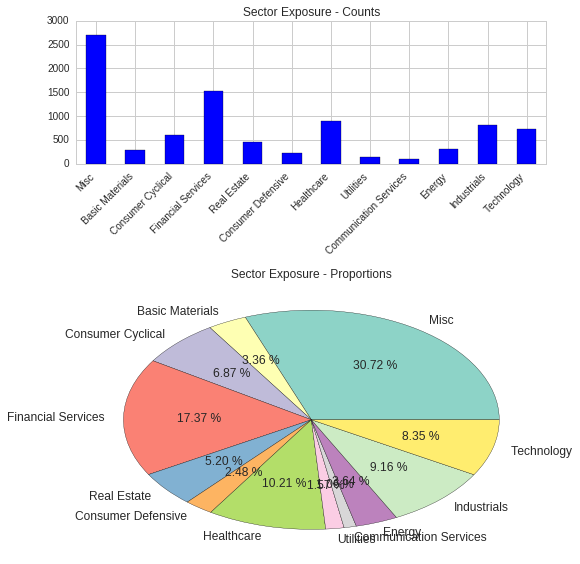

In [2]:
from quantopian.pipeline.classifiers.fundamentals import Sector
from matplotlib import pyplot as plt

SECTOR_CODE_NAMES = {
    Sector.BASIC_MATERIALS: 'Basic Materials',
    Sector.CONSUMER_CYCLICAL: 'Consumer Cyclical',
    Sector.FINANCIAL_SERVICES: 'Financial Services',
    Sector.REAL_ESTATE: 'Real Estate',
    Sector.CONSUMER_DEFENSIVE: 'Consumer Defensive',
    Sector.HEALTHCARE: 'Healthcare',
    Sector.UTILITIES: 'Utilities',
    Sector.COMMUNICATION_SERVICES: 'Communication Services',
    Sector.ENERGY: 'Energy',
    Sector.INDUSTRIALS: 'Industrials',
    Sector.TECHNOLOGY: 'Technology',
    -1 : 'Misc'
}

def get_data(day, universe):
    pipe = Pipeline(columns={'Sector': Sector()}, screen=universe)
    return run_pipeline(pipe, day, day)


def calculate_sector_counts(sectors):
    counts = (sectors.groupby('Sector').size())

    # Replace numeric sector codes with human-friendly names
    counts.index = counts.index.map(lambda code: SECTOR_CODE_NAMES[code])
    return counts


def plot_sector_counts(sector_counts):
    
    bar = plt.subplot2grid((5,10), (0,0), rowspan=2, colspan=5)
    pie = plt.subplot2grid((5,10), (2,0), rowspan=3, colspan=5)
    
    # Bar chart
    x = sector_counts.plot(
        kind='bar',
        color='b',
        ax=bar,
    )

    bar.set_xticklabels(bar.get_xticklabels(), rotation=45, ha='right')
    bar.set_title('Sector Exposure - Counts')
    
    # Pie chart
    sector_counts.plot(
        kind='pie', 
        colormap='Set3', 
        autopct='%.2f %%',
        fontsize=12,
        ax=pie,
    )
    pie.set_ylabel('')  # This overwrites default ylabel, which is None :(
    pie.set_title('Sector Exposure - Proportions')
    
    plt.tight_layout();

data = get_data(end_date, universe)
u_sectors = data.reset_index(level=0, drop=True)
print "There are %d assets in this universe." % len(data.index.levels[1])
u_counts = calculate_sector_counts(u_sectors)
plot_sector_counts(u_counts)